# Predicting Survival of Titanic Passenger

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.

The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.


The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.

Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read CSV File

In [3]:
tt = pd.read_csv('C:/Users/priypati/Downloads/titanic_data.csv')

In [5]:
tt.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Print a concise summary of a DataFrame.

In [6]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Generate descriptive statistics.

In [7]:
tt.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### Check Null values

In [8]:
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Check correlation between the parameters

In [9]:
tt.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

### Heat maps display numeric tabular data where the cells are colored depending upon the contained value.

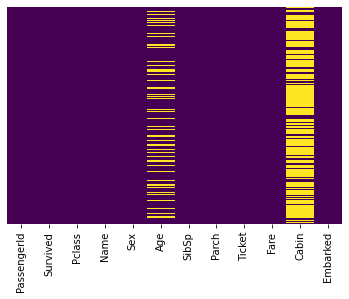

In [16]:
sns.heatmap(tt.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Count the number of survived and deceased passengers

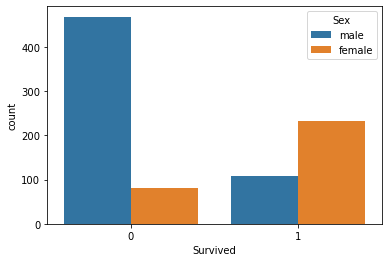

In [15]:
sns.countplot(x='Survived',hue='Sex',data=tt)
plt.show()

### Count the survived and deceased passenger according "Pclass"

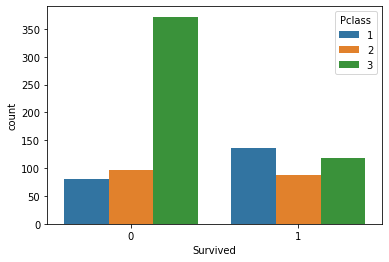

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=tt)
plt.show()

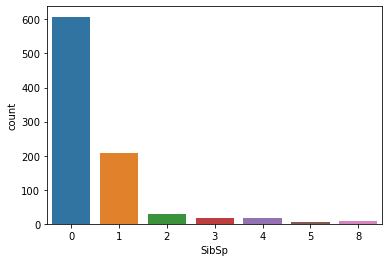

In [17]:
sns.countplot(x='SibSp',data=tt)
plt.show()

### To replace the none values in Age column with mean age of "PClass" , We'll plot boxplot .

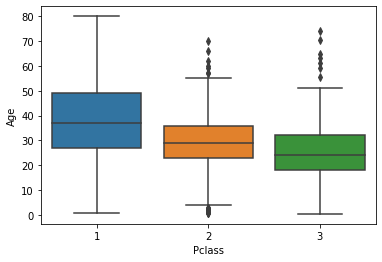

In [18]:
sns.boxplot(x=tt['Pclass'], y=tt['Age'])
plt.show()

### Writing a function to replace the none values in "Age" column.

In [20]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 30
        else:
            return 26
    else:
        return Age

In [21]:
tt['Age'] = tt[['Age','Pclass']].apply(fill_age,axis=1)

#### Now see a heatmap, you'll not find any null values in "Age"

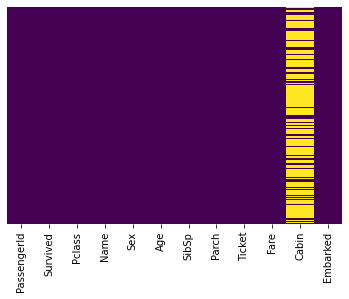

In [22]:
sns.heatmap(tt.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

#### Drop "Cabin", as survival rate is not dependent on type of cabin.

In [24]:
tt.drop(['Cabin'], axis=1,inplace=True)

In [25]:
tt.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [27]:
tt.dropna(inplace=True)

#### We'll get dummies for "Sex" and "Embarked"

In [28]:
sex = pd.get_dummies(tt['Sex'],drop_first=True)
embark = pd.get_dummies(tt['Embarked'],drop_first=True)

In [29]:
tt.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [30]:
tt = pd.concat([tt,sex,embark],axis=1)

In [31]:
tt.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

### Building a Logistic Regression model


#### Let's start by splitting our data into a training set and test set.

### Train Test Split

In [32]:
X = tt.drop(['Survived'],axis=1)
y = tt['Survived']
print(X)
y

     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1       3  22.0      1      0   7.2500     1  0  1
1              2       1  38.0      1      0  71.2833     0  0  0
2              3       3  26.0      0      0   7.9250     0  0  1
3              4       1  35.0      1      0  53.1000     0  0  1
4              5       3  35.0      0      0   8.0500     1  0  1
..           ...     ...   ...    ...    ...      ...   ... .. ..
886          887       2  27.0      0      0  13.0000     1  0  1
887          888       1  19.0      0      0  30.0000     0  0  1
888          889       3  26.0      1      2  23.4500     0  0  1
889          890       1  26.0      0      0  30.0000     1  0  0
890          891       3  32.0      0      0   7.7500     1  1  0

[889 rows x 9 columns]


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## Training and prediction

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [40]:
lr.fit(X_train,y_train)

C:\Users\priypati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predict = lr.predict(X_test)

## Evaluation

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       174
           1       0.84      0.60      0.70       120

    accuracy                           0.79       294
   macro avg       0.80      0.76      0.77       294
weighted avg       0.80      0.79      0.78       294

